In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Configuration:
     def __init__(self, NumberOfScenarios, NumberOfTimesteps):
        self.NumberOfScenarios=NumberOfScenarios 
        self.NumberOfTimesteps = NumberOfTimesteps

In [15]:
class OptionTrade:
      def __init__(self, stock_price, strike_price, risk_free_rate, volatility, time_to_maturity):
            self.stock_price=stock_price
            self.strike_price=strike_price
            self.risk_free_rate=risk_free_rate
            self.volatility=volatility
            self.time_to_maturity = time_to_maturity

In [16]:
class GBMModel:
    def __init__(self, Configuration):
        self.Configuration = Configuration
        
    #simulate risk factors using GBM stochastic differential equation
    def SimulateRiskFactor(self, trade):
        prices = []
        # for this example, we only are concerned with one time step as it's an European option
        timestep = 1
        for scenarioNumber in range(self.Configuration.NumberOfScenarios):
            normal_random_number = np.random.normal(0, 1)           
            drift = trade.risk_free_rate-0.5*(trade.volatility**2)*timestep
            uncertainty =trade.volatility*np.sqrt(timestep)*normal_random_number
            price = trade.stock_price * np.exp(drift+uncertainty)
            prices.append(price)    
        return prices

In [17]:
class OptionTradePayoffPricer:
    def CalculatePrice(self, trade, prices_per_scenario):
        pay_offs = 0
        total_scenarios = len(prices_per_scenario)
        for i in range(total_scenarios):
            price = prices_per_scenario[i]
            pay_off = price - trade.strike_price
            if(pay_off>0): 
                pay_offs=pay_offs+pay_off
        
        discounted_price = (np.exp(-1.0*trade.risk_free_rate * trade.time_to_maturity)*pay_offs)
        result = discounted_price/total_scenarios
        return result

In [18]:
def plot_scenario_paths(prices_per_scenario):
             x=[]
             y=[]
             for i in prices_per_scenario:
                y.append(i)
                y.append(trade.stock_price)
                x.append(1)            
                x.append(0)            
                plt.plot(x, y)            

                plt.ylabel('Stock Value')
                plt.xlabel('Timestep')
                plt.show()

In [19]:
class MonteCarloEngineSimulator:
    
    #instationate with configuration and the model
    def __init__(self, configuration, model):
        self.configuration = configuration
        self.model = model
        
    #simulate trade and calculate price    
    def Simulate(self, trade, tradePricer):
        prices_per_scenario = self.model.SimulateRiskFactor(trade)
        #plot scenarios
        plot_scenario_paths(prices_per_scenario)
        price = tradePricer.CalculatePrice(trade, prices_per_scenario)
        
        return price

In [20]:
configuration = Configuration(100, 1) # config
trade = OptionTrade(200, 200, 0.15, 0.1,1) # trade
model = GBMModel(configuration)
tradePricer = OptionTradePayoffPricer()
simulator = MonteCarloEngineSimulator(configuration, model)
    
    #simulate price
    
    

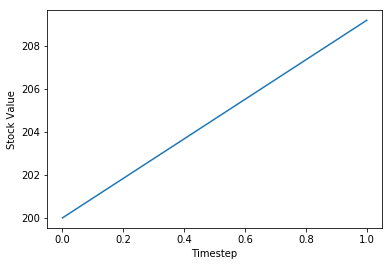

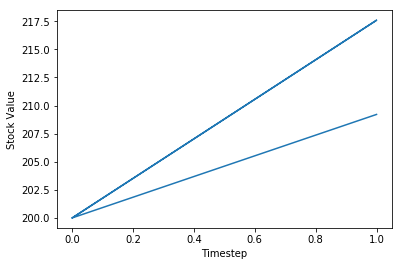

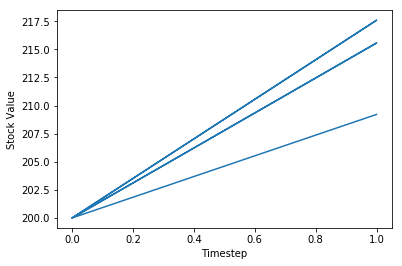

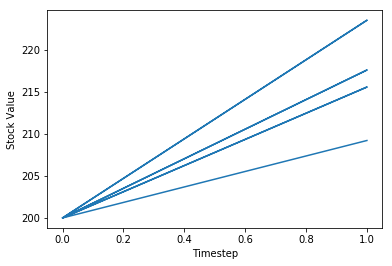

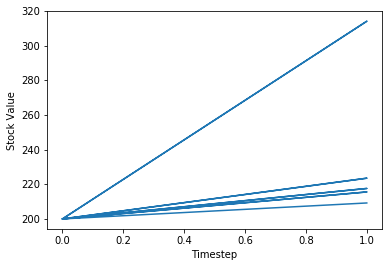

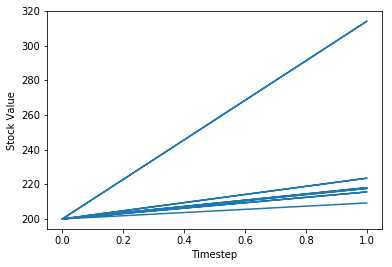

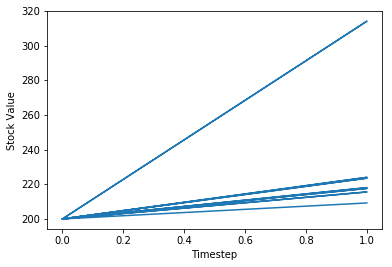

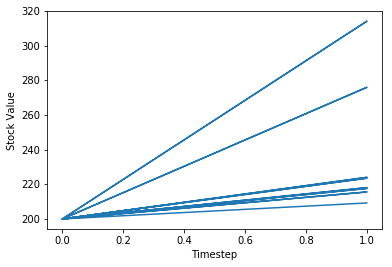

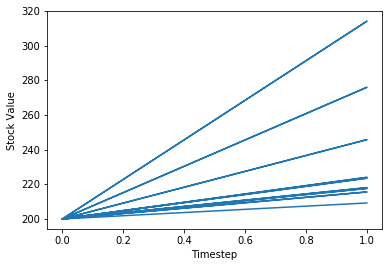

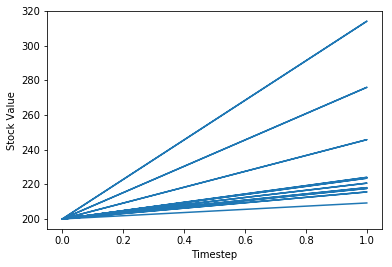

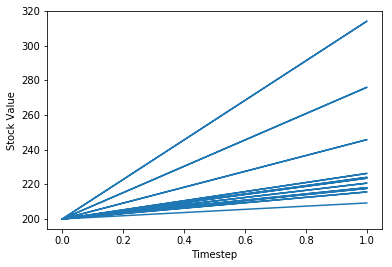

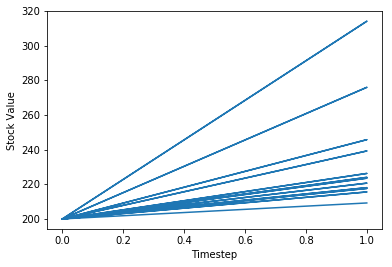

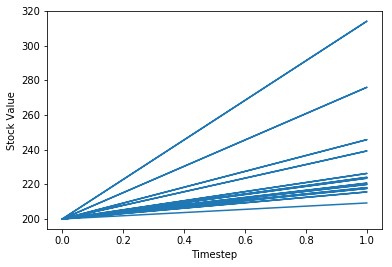

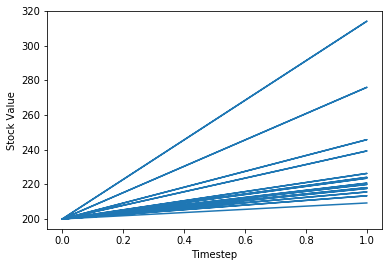

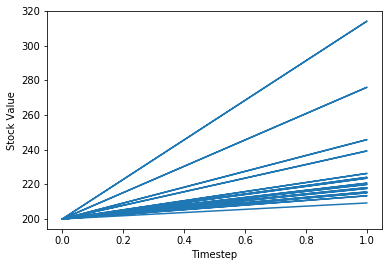

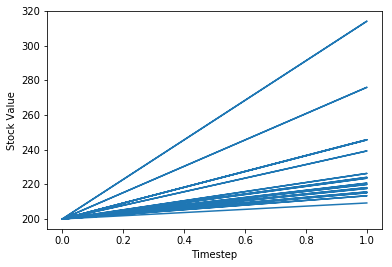

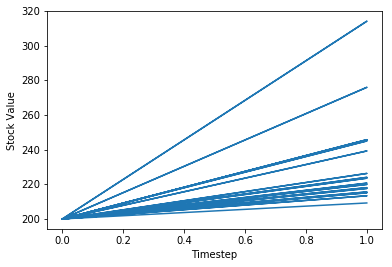

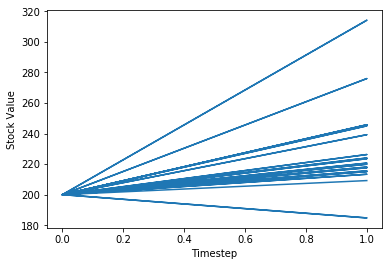

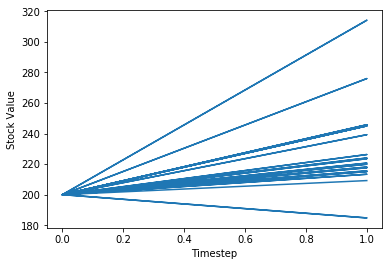

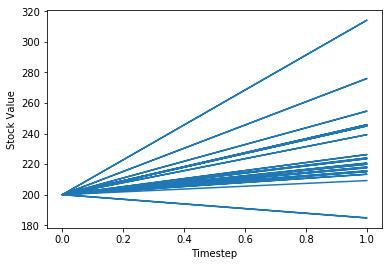

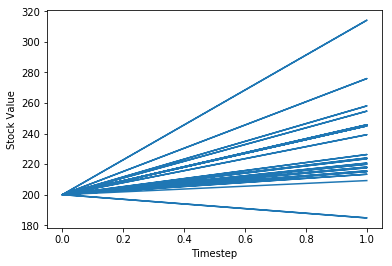

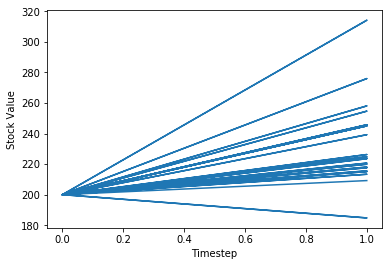

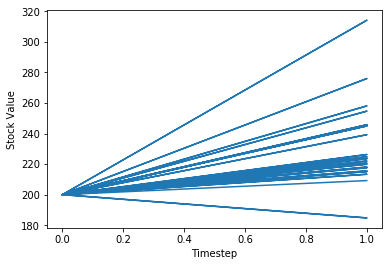

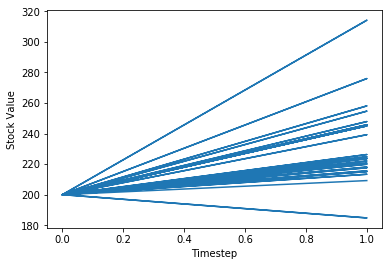

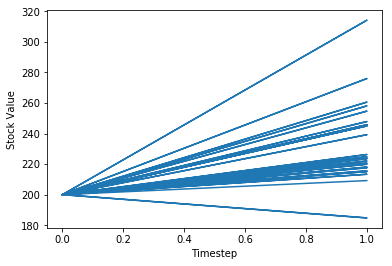

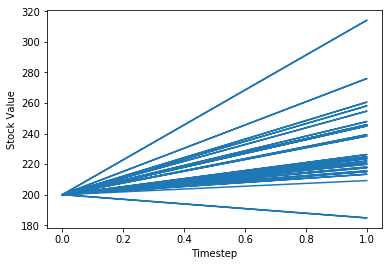

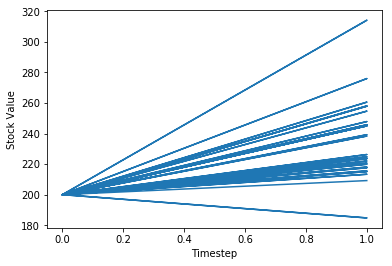

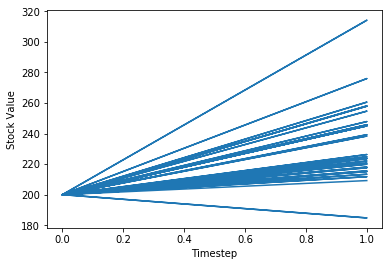

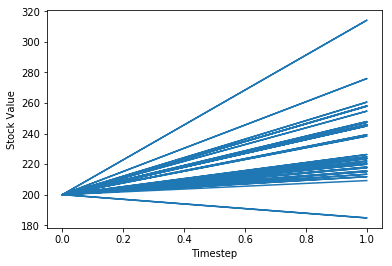

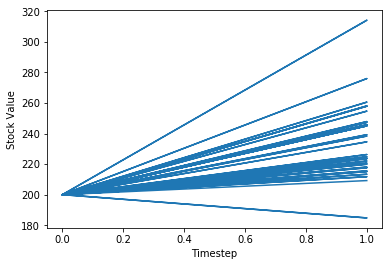

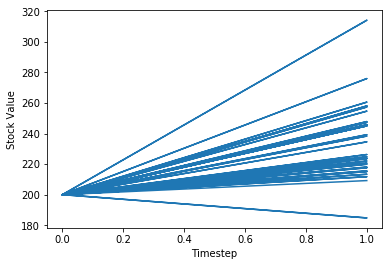

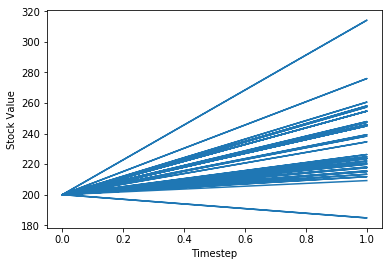

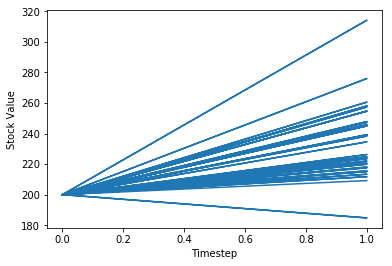

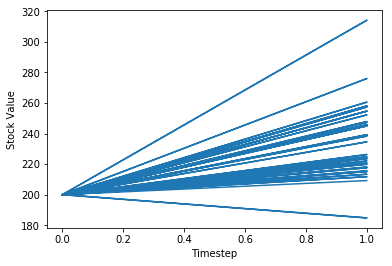

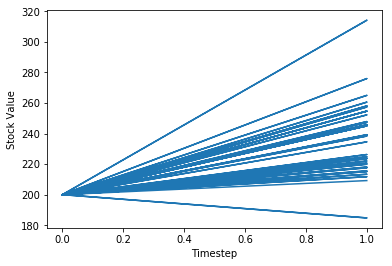

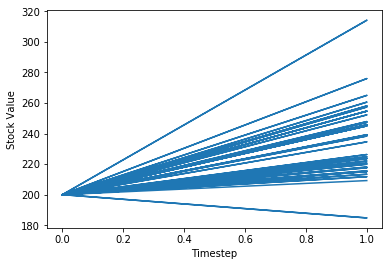

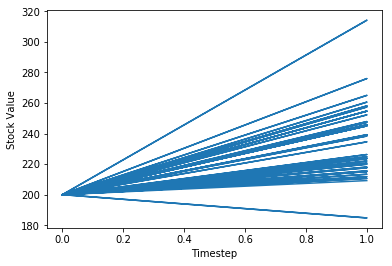

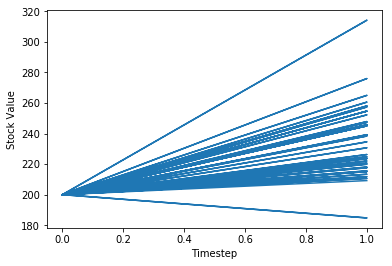

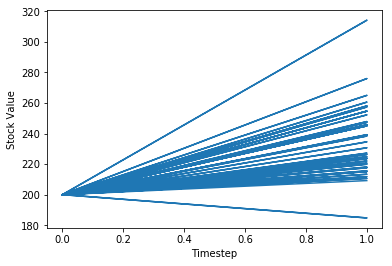

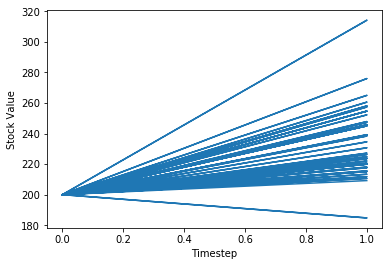

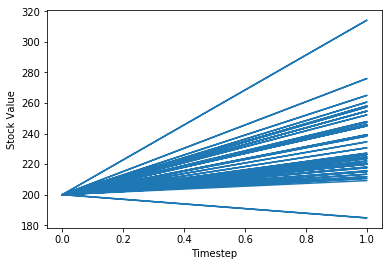

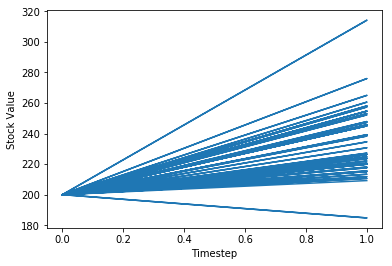

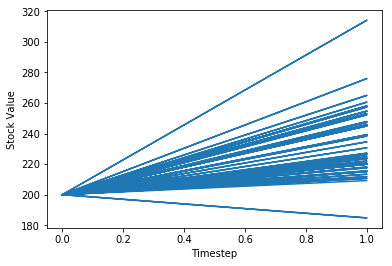

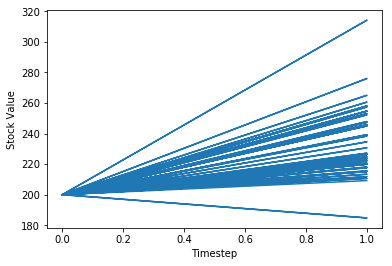

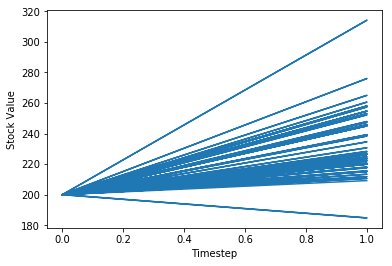

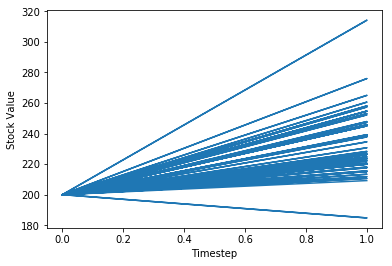

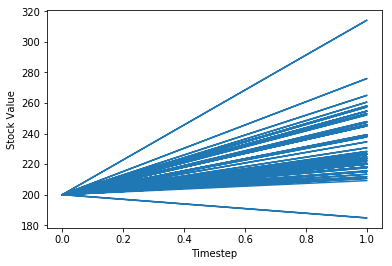

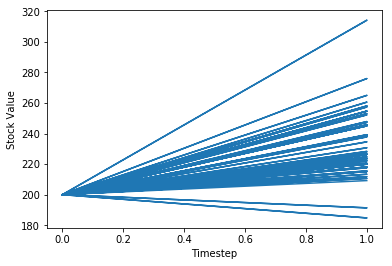

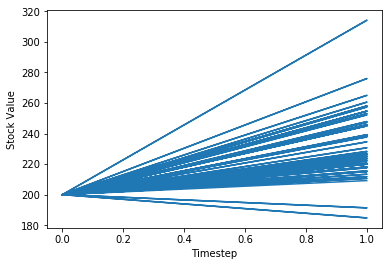

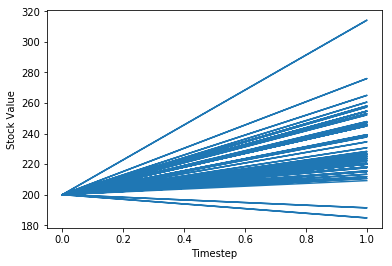

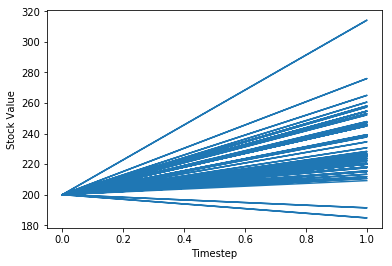

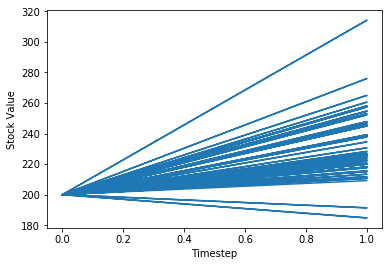

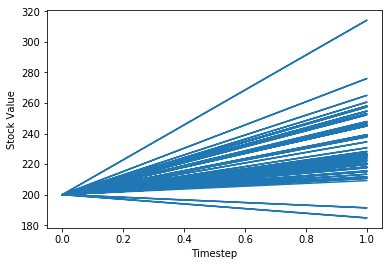

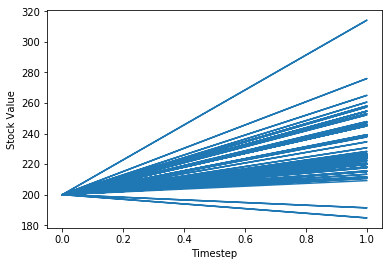

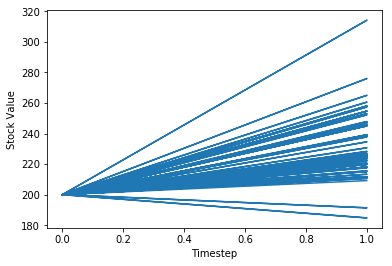

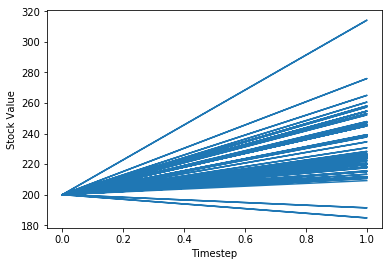

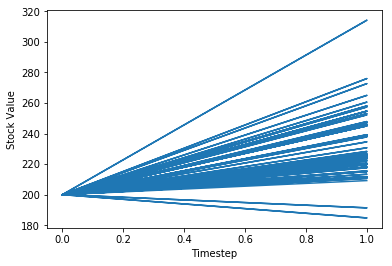

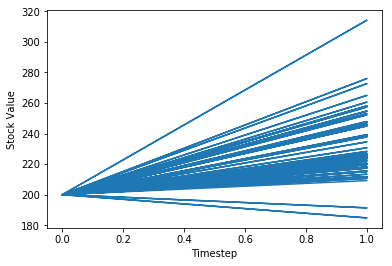

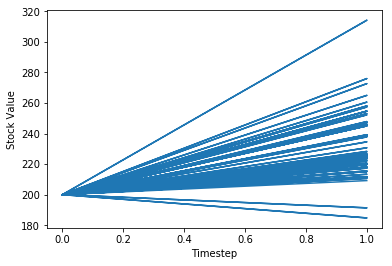

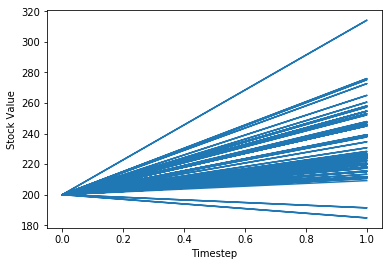

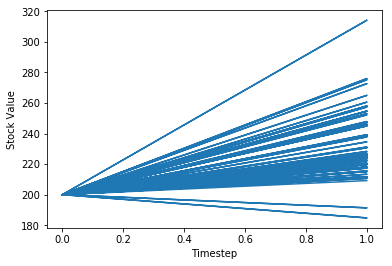

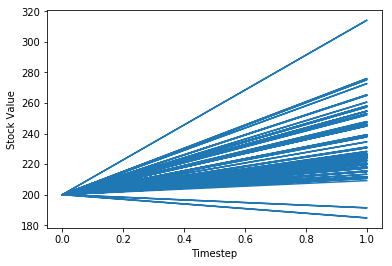

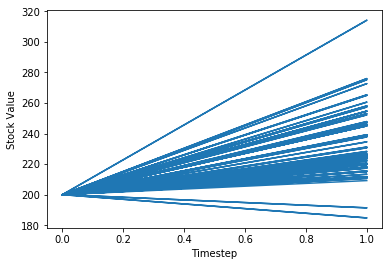

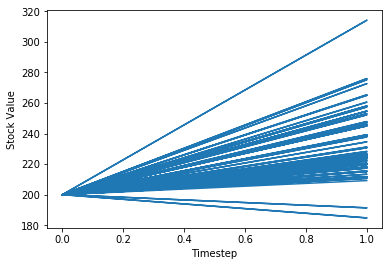

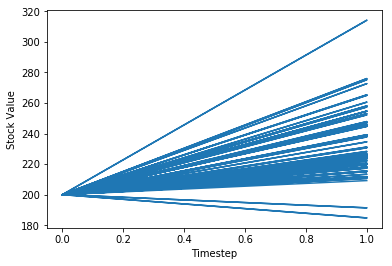

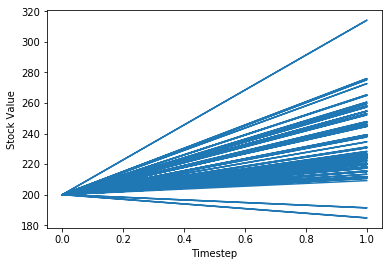

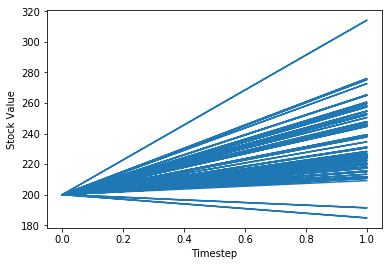

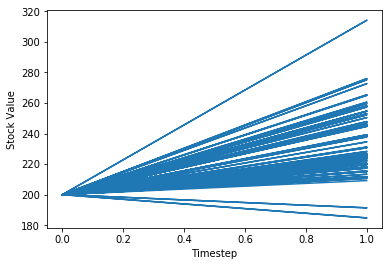

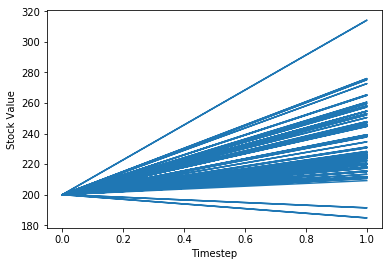

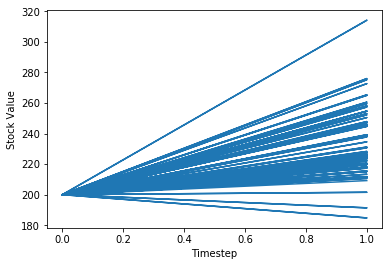

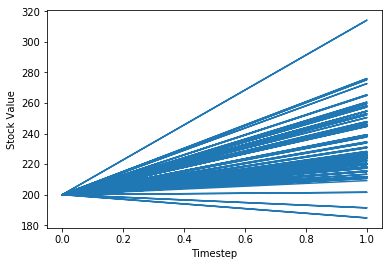

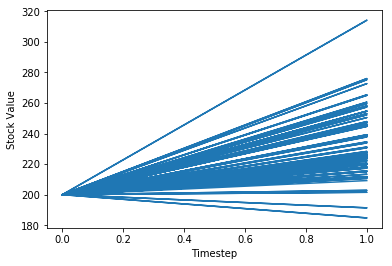

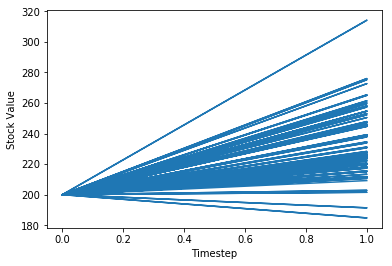

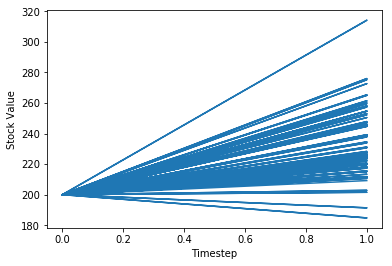

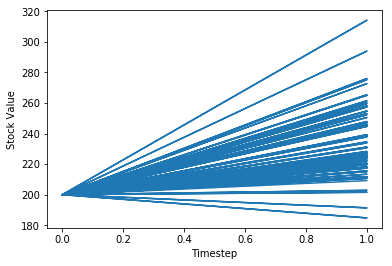

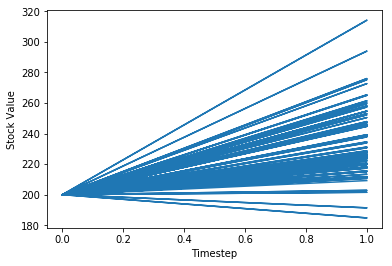

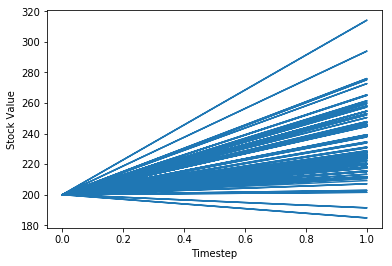

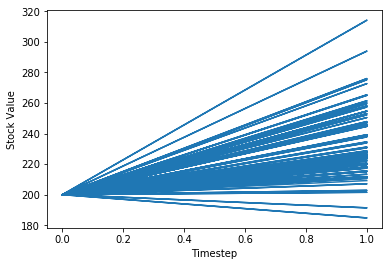

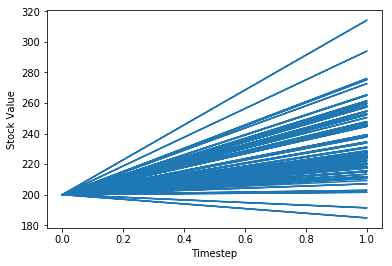

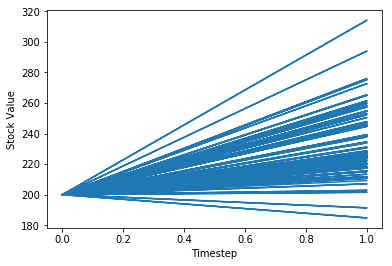

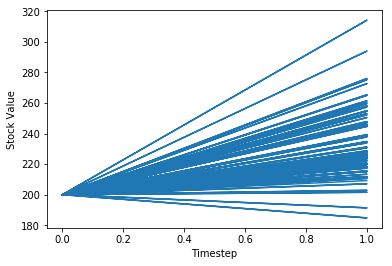

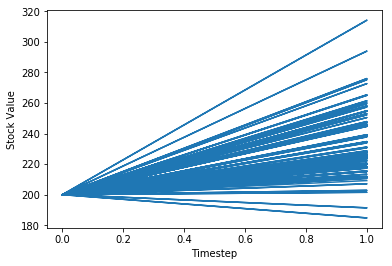

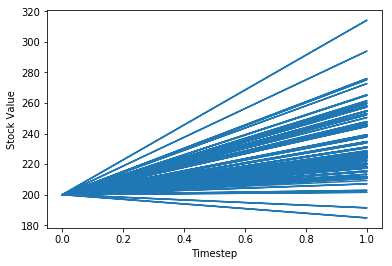

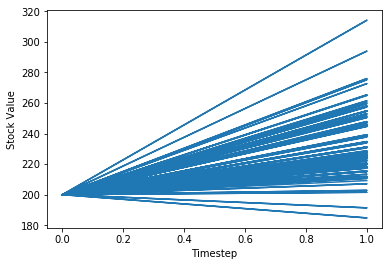

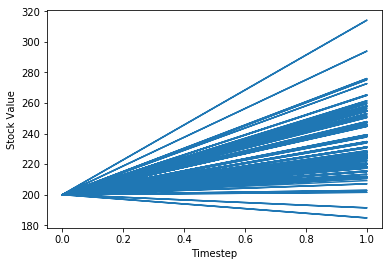

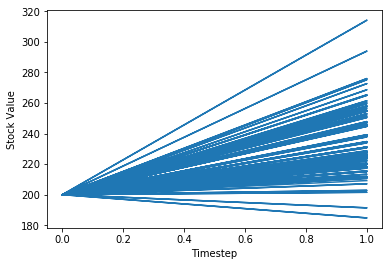

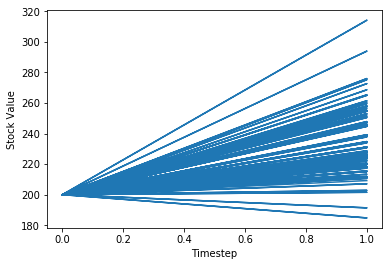

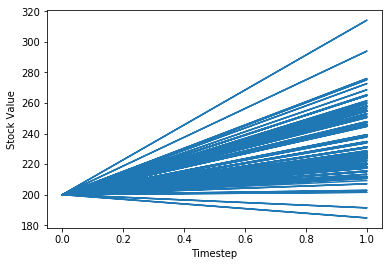

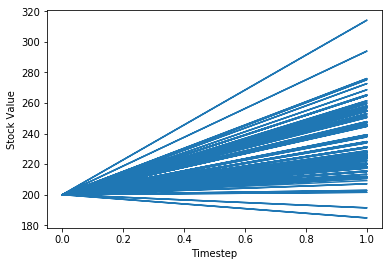

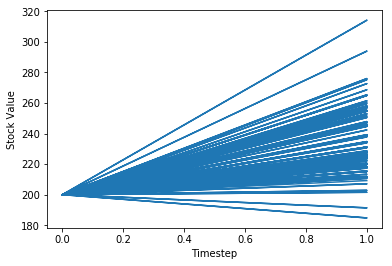

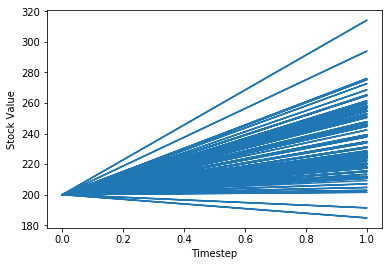

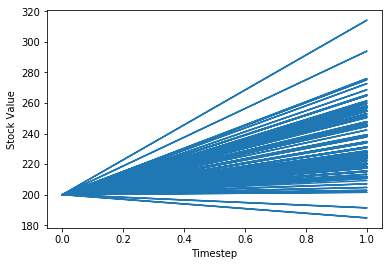

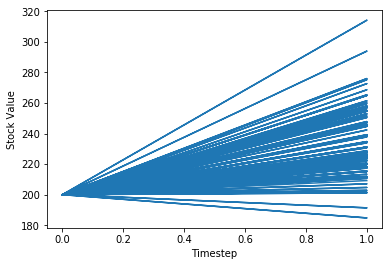

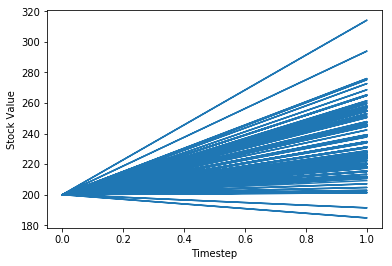

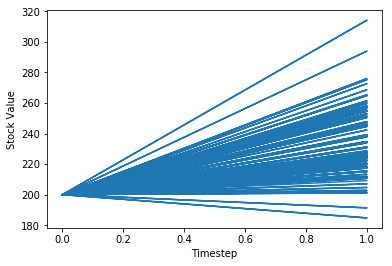

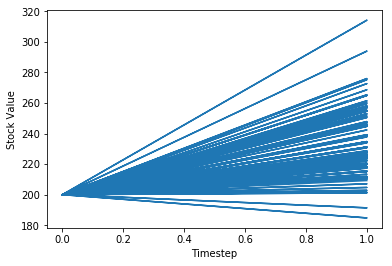

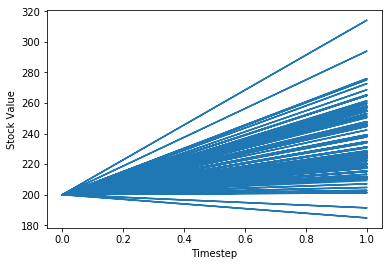

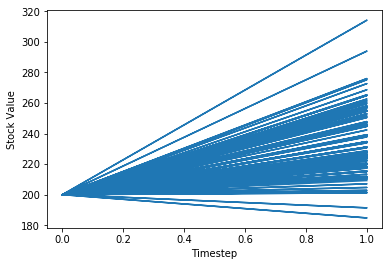

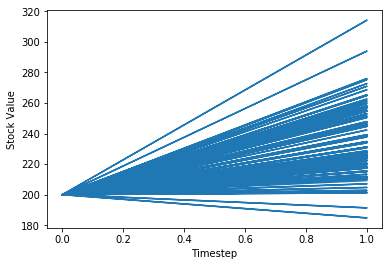

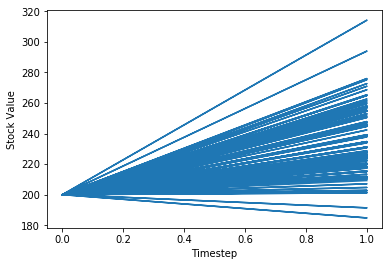

29.863540314871916


In [21]:
price = simulator.Simulate(trade, tradePricer)
print(price)